In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv("DatacyclesDetails.csv")
activities = pd.read_json("activities.json")

In [56]:
debugging = data.loc[(data.work == "Debugging")]
programming = data.loc[(data.work == "Programming")]



In [57]:
debugging.describe()

,activities,cycleTime,edit,test,resrouces,interactingIDE,other
count,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000
mean,3.466437,89.018933,2.092943,1.034423,0.080895,0.191050,0.067126
std,3.629048,121.494904,2.840283,0.232348,0.482804,0.852778,0.317268
min,2.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,2.000000,47.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,4.000000,101.000000,2.000000,1.000000,0.000000,0.000000,0.000000
max,47.000000,1206.000000,35.000000,5.000000,9.000000,15.000000,4.000000


In [58]:
programming.describe()


,activities,cycleTime,edit,test,resrouces,interactingIDE,other
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,6.120773,185.140097,3.913043,1.096618,0.256039,0.541063,0.314010
std,7.505978,276.278308,6.275408,0.406666,0.742045,1.068982,0.904652
min,2.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,38.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,4.000000,84.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,6.000000,206.500000,4.000000,1.000000,0.000000,1.000000,0.000000
max,64.000000,1903.000000,61.000000,5.000000,5.000000,7.000000,8.000000


<AxesSubplot:>

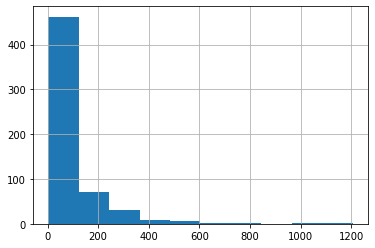

In [59]:
debugging.cycleTime.hist()

<AxesSubplot:>

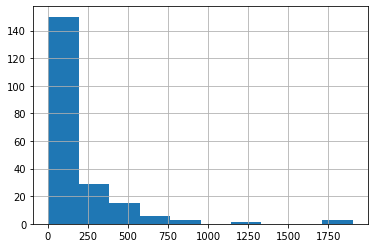

In [60]:
programming.cycleTime.hist()

<AxesSubplot:xlabel='cycleTime', ylabel='Density'>

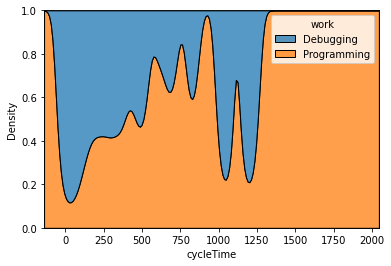

In [61]:
 sns.kdeplot(data=data, x="cycleTime", hue="work", multiple="fill")



<AxesSubplot:xlabel='work', ylabel='activities'>

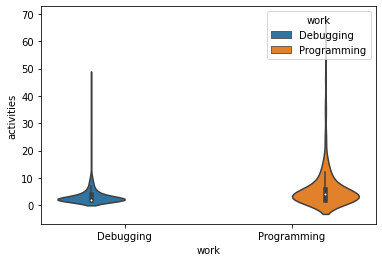

In [62]:
sns.violinplot(data=data, x="work", y="activities", hue="work", multiple="stack")


In [63]:
# sns.histplot(programming.cycleTime)


In [64]:
data["cycle time (log)"] = np.log(data['cycleTime']);

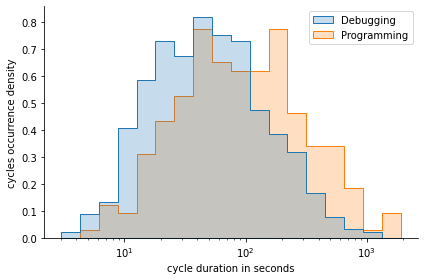

In [65]:
f, ax = plt.subplots()
ax.set(xscale="log")

sns.histplot(data, x="cycleTime", hue="work", element="step" ,stat="density", common_norm=False, ax=ax,legend=True)
ax.get_legend().set_title(None)


sns.despine(top = True, right = True)

ax.set_xlabel("cycle duration in seconds")
ax.set_ylabel("cycles occurrence density")
plt.tight_layout()
plt.savefig("cyclesTimevsCycleDensity.pdf")

<AxesSubplot:xlabel='cycleTime', ylabel='Density'>

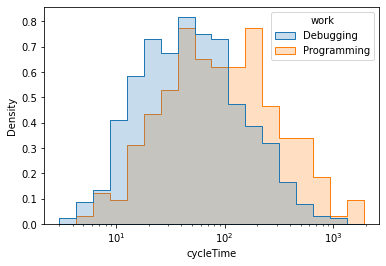

In [66]:
sns.histplot(data, x="cycleTime", hue="work", element="step" ,stat="density", common_norm=False, log_scale=True)


31.716666666666665

In [67]:
activities["activity time (log)"] = np.log(activities['time']);

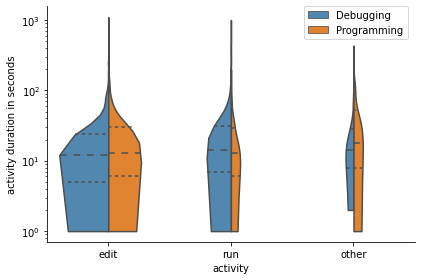

In [90]:
f, ax = plt.subplots()
ax.set(yscale="log")
g=sns.violinplot(x="activity", y="time", hue="work", data=activities,  split=True,
                    scale="count", inner="quartile",scale_hue=False,cut=0, ax=ax, palette={"Programming": "#FF8213", "Debugging": "#428BBF"})
ax.set_ylabel("activity duration in seconds")
sns.despine(top = True, right = True)
ax.legend(bbox_to_anchor=(.7, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.savefig("activityvsDurationpdf.pdf")

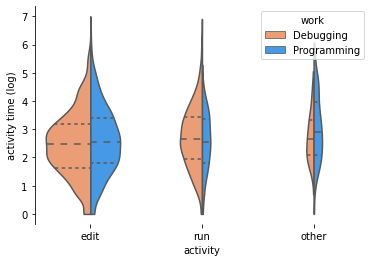

In [76]:

sns.violinplot(x="activity", y="activity time (log)", hue="work", data=activities,  split=True,
                    scale="count", inner="quartile",
                    scale_hue=False,cut=0,  palette={"Debugging": "#FF9862", "Programming": "#2B9AFF"})
sns.despine(bottom = True, right = True)


<AxesSubplot:xlabel='activity', ylabel='time'>

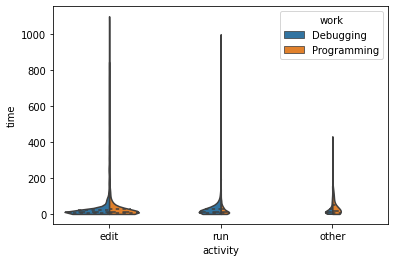

In [70]:
sns.violinplot(x="activity", y="time", hue="work", data=activities,  split=True,
                    scale="count", inner="quartile",
                    scale_hue=False,cut=0 )

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [71]:
activities.describe()

,time,activity time (log)
count,3281.000000,3281.000000
mean,27.444072,2.600294
std,52.681596,1.149645
min,1.000000,0.000000
25%,6.000000,1.791759
50%,13.000000,2.564949
75%,28.000000,3.332205
max,1101.000000,7.003974
